<img src="images/00-mathematics_with_python.png" style="height:250px" align="left">

<!--NAVIGATION-->
< [2 Matplotlib](22-matplotlib.ipynb) | [III Solving Mathematical Problems](30-solving_mathematical_problems.ipynb) >

# 3 Sympy
SymPy is a library for symbolic mathematics.
It integrates the functionality of a computer algebra system into Python.

In [1]:
import sympy as sp
print(sp.__version__)

1.12


<h1>Solving ODEs with SymPy</h1>

# What should I know before I start?
 - You know the difference between numerical and symbolic computation. 

# Solving ODEs with SymPy

## Why do we use SymPy for solving ODEs?
In scientific and technical applications, ordinary differential equations (ODE) are usually so complex that the calculation of an exact solution with paper and pencil is very extensive or in some cases not possible at all.
The most common methods for solving differential equations are implemented in today's computer algebra systems.
These systems have the advantage that they can perform extensive calculations very reliably. In Python the library for symbolic mathematics is called `sympy`.

<div class="alert alert-block alert-danger">
The `sympy` library is constantly being further developed.      
This Jupyter Notebook is proofen to work with version `1.9`.
</div>

In [2]:
import sympy as sp
print('sympy version = '+ sp.__version__)
sp.init_printing()

sympy version = 1.12


## How do we solve ODEs with SymPy?
The solution of an ordinary differential equation consists of a function $y$ depending on a variable $x$.
SymPy provides the methods `sympy.Symbol()` and `sympy.Function()` to declare variables and functions.

In [3]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

In addition to the function itself, differential equations contain derivatives of this function.
Derivatives are specified by `sympy.Derivative()`.

In [4]:
yp = sp.Derivative(y)

Symbolic equations in SymPy are not represented by `=` or `==`, but by `sympy.Eq()`.
Many different types of ordinary differential equations can be solved be `sympy.dsolve()`.

<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the ordinary differential equation
    
$$
    y'(x) + \frac{y(x)}{x} = \frac{2}{1 + x^2} \, .
$$  
</div>

In [5]:
ode = sp.Eq(yp+y/x,2/(1+x**2))
sp.dsolve(ode)

## What about ODEs with parameters?
Solving differential equations is often so complex because the equations contain many parameters.
With SymPy it is also possible to solve differential equations that contain parameters.

<div class="alert alert-block alert-warning">
    
<b>Example</b>

The differential equation of an oscillation can be formulated by
    
$$
    \ddot{x}(t) + 2 \, \delta \, \dot{x}(t) + \omega_0^2 \, x(t) = 0 \, .
$$  
</div>

In [6]:
t, delta, omega_0 = sp.symbols('t, delta, omega_0')
x = sp.Function('x')(t)
xp = sp.Derivative(x)
xpp = sp.Derivative(xp)
ode = sp.Eq(xpp+2*delta*xp+omega_0**2*x,0)
sp.dsolve(ode)

## How to extend to initial value problems?
An initial value problem consists of a differential equation and some initial conditions.
The initial conditions are specified values of the unknown function for certain variable values.
In SymPy initial conditions are built using `subs()` for the substitution of the variable values.

<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the initial value problem
    
$$
    \ddot{x}(t) + 2 \, \dot{x}(t) - 3 \, x(t) = 2 \, \sin(t),  \quad x(0) = 0, \, \dot{x}(0) = 1 \, .
$$  
</div>

In [7]:
ode = sp.Eq(xpp+2*xp-3*x,2*sp.sin(t))
initconds = {x.subs(t, 0): 0, xp.subs(t, 0): 1}
sol = sp.dsolve(ode,ics=initconds)

$$
x{\left(t \right)} = \frac{e^{t}}{2} - \frac{2 \sin{\left(t \right)}}{5} - \frac{\cos{\left(t \right)}}{5} - \frac{3 e^{- 3 t}}{10}
$$

So far we have managed to find the particular solution to this differential equation. On the left hand side the solution consists of the name of the function and the variable, i.e. $x(t)$. In order to plot the solution the right hand side of the solution is used.

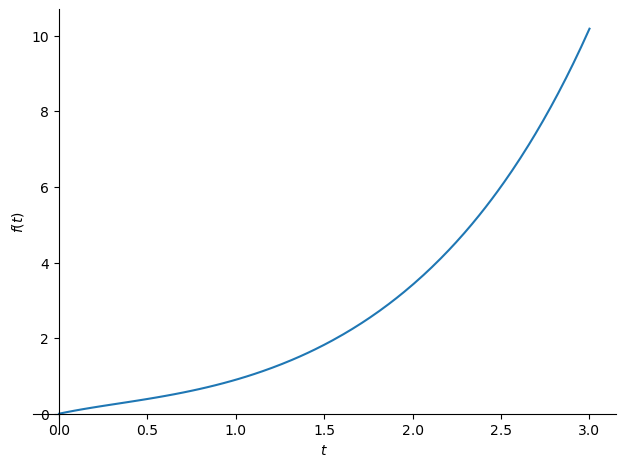

In [8]:
sp.plot(sol.rhs,(t,0.0,3.0))

With `simpy.lambdify()` the symbolic expression can be transformed to a function which can be used to calculate numerical values very fast.

In [9]:
x = sp.lambdify(t,sol.rhs)
x(1.0)

## What are the limitations?
Not all ordinary differential equations can be precisely mathematically solved.
Therefore, `sympy.dsolve()` is also not able to solve all problems.

The solution of differential equations with parameters sometimes depends on special properties of the parameters.
For example the solution of the differential equation of an oscillation
    
$$
    \ddot{x}(t) + 2 \, \delta \, \dot{x}(t) + \omega_0^2 \, x(t) = 0
$$

depends on the relation between $\delta$ and $\omega_0$.

# Conclusion
 - Many ordinary differential equations can be solved using `sympy.dsolve()`.
 - It is possibel to add initial conditions.
 - Differential equations containing parameters can be handled.

# Did you get it?
<div class="alert alert-block alert-info">
    
<b>Task 1</b>
    
Calculate all solutions to the ordinary differential equation
    
$$
    y''(x) + 2 \, y'(x) + 2 \, y(x) = 0 \, .
$$
</div>

In [10]:
t = sp.symbols('t')
x = sp.Function('x')(t)
xp = sp.Derivative(x)
xpp = sp.Derivative(xp)
ode = sp.Eq(xpp + 2*xp + 2*x,0)
sp.dsolve(ode)




<div class="alert alert-block alert-info">
    
<b>Task 2</b>

Radioactive decay, with decay rate $\lambda$, can be desribed by the initial value problem

$$
\frac{\dot{N}(t)}{ N(t)} = -\lambda, \quad N(0) = N_0.
$$
    
Calculate the solution with SymPy.
</div>

In [16]:
# Step 2: Define symbols and variables
t = sp.symbols('t')
N = sp.Function('N')(t)
N0, lmbda = sp.symbols('N0 lambda', real=True, positive=True)

# Step 3: Define the differential equation
ode = sp.Eq(sp.Derivative(N, t)/N, -lmbda)

# Step 4: Solve the differential equation
solution = sp.dsolve(ode)

# Step 5: Substitute the initial condition
conds = solution.subs({N.subs(t, 0): N0})

# Step 6: Display the solution
display(conds)




## Literature
- https://docs.sympy.org
- https://youtu.be/lzLv7kEiXOA

In [13]:
# Step 2: Define symbols and variables
t = sp.symbols('t')
N = sp.Function('N')(t)
N0, lmbda = sp.symbols('N0 lambda', real=True, positive=True)

# Step 3: Define the differential equation
diffeq = sp.Eq(sp.Derivative(N, t)/N, -lmbda)

# Step 4: Solve the differential equation
solution = sp.dsolve(diffeq)

# Step 5: Substitute the initial condition
solution_with_initial_condition = solution.subs({N.subs(t, 0): N0})

# Step 6: Display the solution
display(solution_with_initial_condition)